# Praca domowa 6

## Zadanie 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [11]:
mediana_jakosci = df['condition'].median()
domy_nad_woda = df[df['waterfront']==1]

wysoka_jakosc = domy_nad_woda[domy_nad_woda['condition']>=mediana_jakosci]
srednia_cena = wysoka_jakosc['price'].mean()
print(round(srednia_cena,2))

542085.78


Odp:

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [12]:
pietra_2 = df[df['floors']==2]
pietra_3 = df[df['floors']==3]

mediana_2_pieter = pietra_2['bathrooms'].median()
mediana_3_pieter = pietra_3['bathrooms'].median()

if mediana_2_pieter > mediana_3_pieter:
    print("nieruchomości o 2 piętrach mają większą liczbę łazienek niż nieruchomości o 3 pietrach")
else:
    print("nieruchomości o 3 piętrach mają większą liczbę łazienek niż nieruchomości o 2 pietrach")

nieruchomości o 3 piętrach mają większą liczbę łazienek niż nieruchomości o 2 pietrach


Odp:

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [23]:
# Zaczynam pisac po angielsku bo mnie te kolumny w ramce juz zaczynaja mylic

north = abs(max(df['lat'])+min(df['lat']))/2
north_houses = df[df['lat']>=north]
north_houses_water = domy_nad_woda[domy_nad_woda['lat']>=north]

# no waterview
q_25 = north_houses['condition'].quantile(0.25)
q_75 = north_houses['condition'].quantile(0.75)

# yes waterview
q_25_w = north_houses_water['condition'].quantile(0.25)
q_75_w = north_houses_water['condition'].quantile(0.75)

print("kwantyle 0.25 i 0.75 jakosci wykonczenia dla domow nad wodą to: ",q_25_w,", ",q_75_w)
print("kwantyle 0.25 i 0.75 jakosci wykonczenia dla domow nie przy wodzie to: ",q_25,", ",q_75)

kwantyle 0.25 i 0.75 jakosci wykonczenia dla domow nad wodą to:  3.0 ,  4.0
kwantyle 0.25 i 0.75 jakosci wykonczenia dla domow nie przy wodzie to:  3.0 ,  4.0


Odp:

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [32]:
most_frequent_zipcode = df['zipcode'].value_counts().idxmax()
print("Najczestszy kod pocztowy to: ",most_frequent_zipcode)

prices = df[df['zipcode'] == most_frequent_zipcode]['price']
my_iqr = prices.quantile(0.75)-prices.quantile(0.25)
print("Szukany IQR to: ",my_iqr)

Najczestszy kod pocztowy to:  98103
Szukany IQR to:  262875.0


Odp:

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [ ]:
?????

Odp:

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [51]:
middle_N_S = abs(max(df['lat'])+min(df['lat']))/2
middle_W_E = abs(max(df['long'])+min(df['long']))/2

all_houses = df.value_counts().sum()
north_west = df[df['lat']>middle_N_S].value_counts().sum()
south_east =  all_houses - north_west

p1 = round(north_west/all_houses *100,2)
p2 = round(south_east/all_houses *100,2)
result = round(p1-p2,2)
print("Tych nieruchomosci jest o",result,"% więcej")

Tych nieruchomosci jest o 50.96 % więcej


Odp:

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

Text(0.5, 1.0, 'Najczęstsze oceny domów')

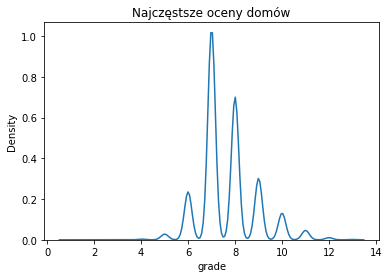

In [75]:
import seaborn as sns
sns.kdeplot(df['grade'])
plt.title('Najczęstsze oceny domów')

b)

Text(0.5, 1.0, 'Liczba łazienek, a zadowolenie/ ocena z domu')

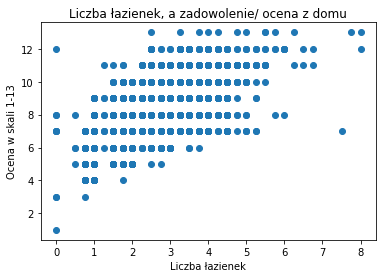

In [68]:
x = df['bathrooms']
y = df['grade']

plt.scatter(x,y)
plt.xlabel("Liczba łazienek")
plt.ylabel("Ocena w skali 1-13")
plt.title("Liczba łazienek, a zadowolenie/ ocena z domu")

c)

Text(0, 0.5, 'Cena obiektu w skali 10*6')

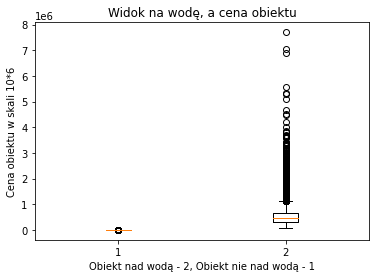

In [101]:
x = df['waterfront']
y = df['price']

data = [x, y]

plt.boxplot(data)
plt.title("Widok na wodę, a cena obiektu")
plt.xlabel("Obiekt nad wodą - 2, Obiekt nie nad wodą - 1")
plt.ylabel("Cena obiektu w skali 10*6")